In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import numpy as np

In [105]:
data = pd.read_csv('Titanic-Dataset.csv')

In [107]:
X = data[['Sex', 'Age', 'Pclass']]
y = data['Survived']

<Axes: xlabel='Age', ylabel='Density'>

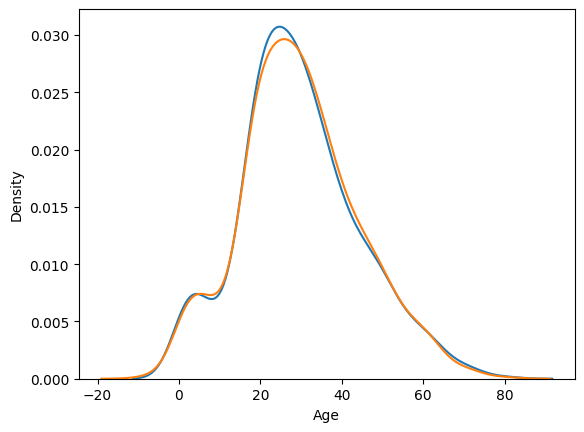

In [ ]:
mean_age = X['Age'].mean()
std_age = X['Age'].std()
X_ = X.copy()
# Impute missing values with random numbers drawn from a normal distribution with mean and std of X.Age
mask = X['Age'].isnull()
X_.loc[mask, 'Age'] = np.random.normal(mean_age, std_age, mask.sum())

X_['Age']

sns.kdeplot(X.Age)
sns.kdeplot(X_.Age)

In [112]:
X=X_

In [113]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y)

In [114]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

ct = make_column_transformer(
    (StandardScaler(), ['Age']),
    (OneHotEncoder(), ['Sex', 'Pclass'])
)

In [115]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

pipe = make_pipeline(
    ct,
    RandomForestClassifier()
)

In [116]:
pipe.fit(x_train, y_train)

,steps,"[('columntransformer', ...), ('randomforestclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('standardscaler', ...), ('onehotencoder', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [117]:
prediction = pipe.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)*100

79.82062780269058

In [118]:
joblib.dump(pipe, "titanic_model.pkl")

['titanic_model.pkl']

In [127]:
x_train.iloc[2], y_train.iloc[2]

(Sex       female
 Age         24.0
 Pclass         1
 Name: 341, dtype: object,
 np.int64(1))

In [132]:
val = pd.DataFrame([['female', 24.0, 1]], columns=["Sex", "Age", "Pclass"])
out = pipe.predict(val)
out[0]

np.int64(1)

In [133]:
X.Pclass.unique()

array([3, 1, 2])